# 데이터 시각화
`작성자: 최원칠 강사`   
`traveler4d@gmail.com`

### 주요 내용


1. 선그래프, 막대그래프, 산점도그래프
2. 여러개의 그래프
3. 히스토그램, 상자그림, 히트맵


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df_cm = pd.read_csv('data/Churn_Modeling.csv')
df_ins = pd.read_csv('data/insurance.csv')
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_wm = pd.read_excel('./data/waterMesntkInfo202309.xlsx',header=1)
df_wm['날짜'] = df_wm['날짜'].astype('str').apply(lambda x: f'{x[:4]}-{x[4:6]}-{x[6:]}')


In [115]:
# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')

<br>

## 1. 기본 그래프 작성

**matplotlib** 과 **seaborn** 을 활용하여 막대그래프, 선그래프, 산점도그래프와 같은 기본적인 그래프를 그릴 수 있음'
>그래프 함수에 x축과 y축에 해당될 여러개의 1차원구조(리스트, 배열, 시리즈등)가 x,y 간의 순서와 개수에 맞게 입력 
<br>


In [5]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



### 1.1. 막대그래프
두변수를 선택하여 **matplotlib**의 *bar()* 또는 **seaborn**의 *barplot()* 를 활용하여 막대그래프 생성

In [6]:
# 막대그래프 표현을 위한 데이터 집계
g_sp = df_sp[['race/ethnicity','math score','reading score']].groupby('race/ethnicity', as_index = False).mean()
g_sp

,race/ethnicity,math score,reading score
0,group A,61.629213,64.674157
1,group B,63.452632,67.352632
2,group C,64.463950,69.103448
3,group D,67.362595,70.030534
4,group E,73.821429,73.028571


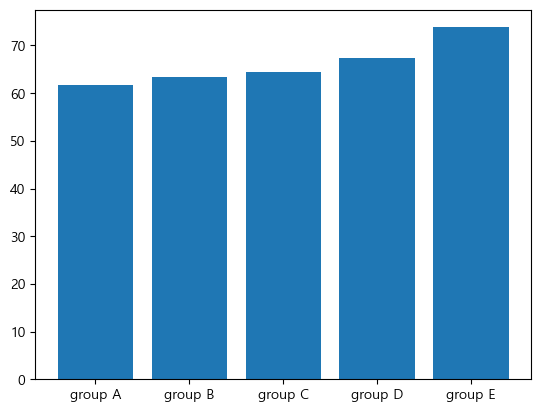

In [7]:
# bar() 함수로 막대그래프 생성
plt.bar(x=g_sp['race/ethnicity'], height=g_sp['math score'])
plt.show()

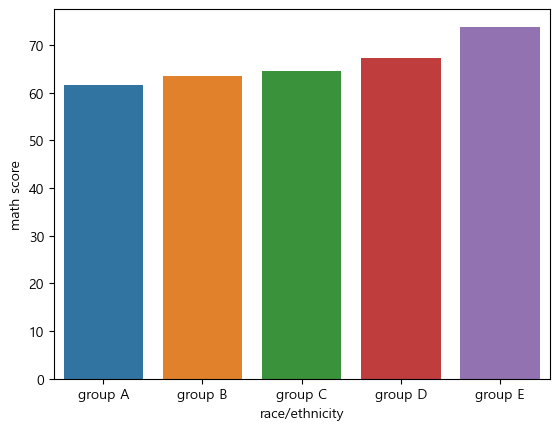

In [8]:
# barplot() 함수로 막대그래프 생성
sns.barplot(data = g_sp, x = 'race/ethnicity', y='math score')
plt.show()

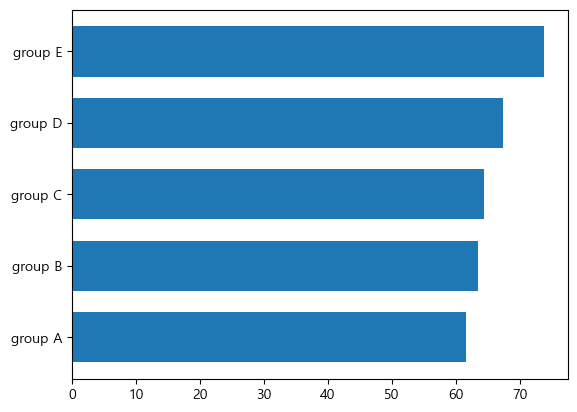

In [9]:
# barh() 함수로 수평 막대그래프 생성
plt.barh(y=g_sp['race/ethnicity'], width=g_sp['math score'] , height=0.7)
plt.show()

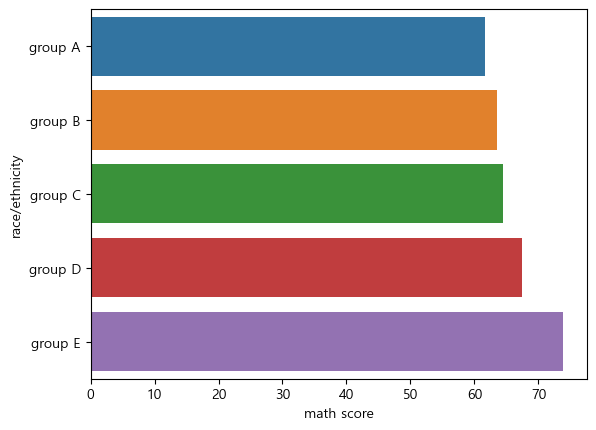

In [10]:
# 범주형(문자열) 데이터가 설정되는 축에 따라 수평, 수직이 자동 설정
sns.barplot(data = g_sp, y='race/ethnicity', x='math score')
plt.show()


### 1.2. 선그래프
두변수를 선택하여 **matplotlib**의 *plot()* 또는 **seaborn**의 *lineplot()* 를 활용하여 선그래프 생성

In [116]:
df_sub = df_wm[df_wm['측정소명'] == '노량진_자동']
g_wm = df_sub.groupby('날짜',as_index = False)['수온'].mean()
g_wm

,날짜,수온
0,2023-09-01,24.754167
1,2023-09-02,24.458333
2,2023-09-03,24.062500
3,2023-09-04,23.939130
4,2023-09-05,24.079167
5,2023-09-06,24.941667
6,2023-09-07,25.377273
7,2023-09-08,25.675000
8,2023-09-09,26.258333
9,2023-09-10,26.525000


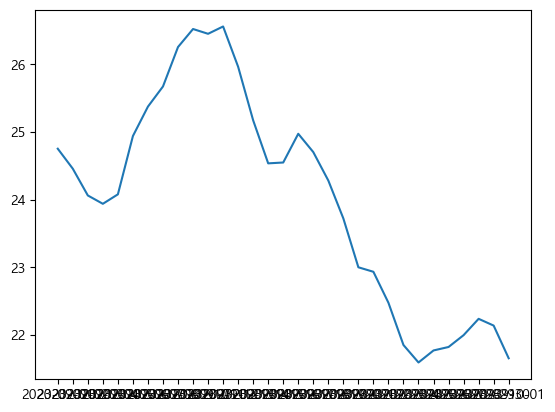

In [117]:
# plot() 함수로 막대그래프 생성
x = g_wm['날짜']
y = g_wm['수온']
plt.plot(x, y)
plt.show()


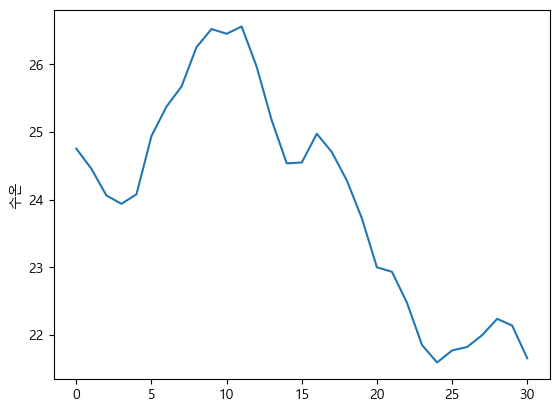

In [118]:
# 입력된 데이터타입이 수치형(시퀀스)이면 눈금조정, 문자열(범주형)이면 모든 눈금 표현
sns.lineplot(data = g_wm, x =range(len(g_wm)), y='수온')
plt.show()

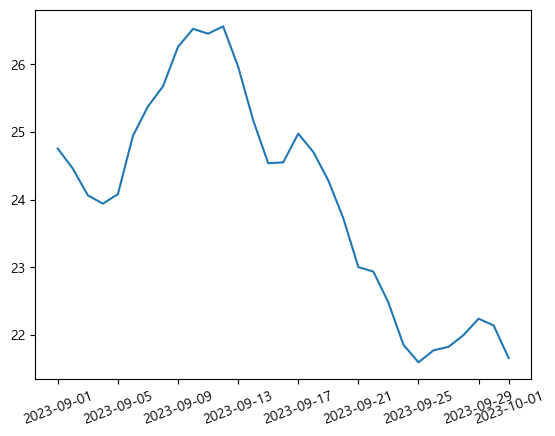

In [119]:
# 날짜형은 시퀀스 데이터타입으로 눈금이 조정됨

x = g_wm['날짜'].astype('datetime64')
y = g_wm['수온']
plt.plot(x, y)
plt.xticks(rotation=20) # x눈금을 20도 회전
plt.show()

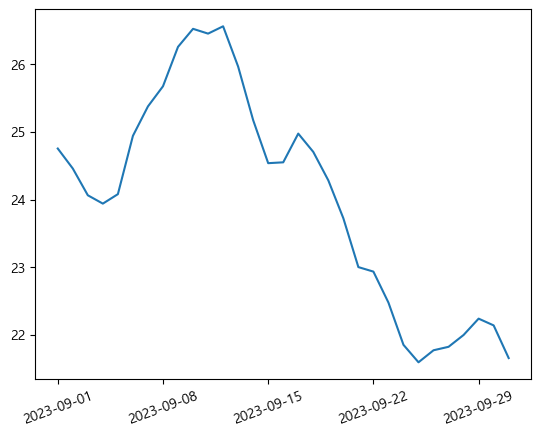

In [120]:
# [참고] xticks() 함수로 눈금 표현 수정
x = g_wm['날짜']
y = g_wm['수온']
xtick = [xt for xt in range(len(x)) if xt % 7 == 0]
labels = [x[xt] for xt in xtick]

plt.plot(x, y)
plt.xticks(xtick, labels, rotation=20)
plt.show()


### 1.3. 산점도그래프
두변수 이상을 선택하여 **matplotlib**의 *scatter()* 또는 **seaborn**의 *scatterplot()* 를 활용하여 산점도그래프 생성

In [121]:
df_wm

,날짜,시간,측정소명,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L),총유기탄소,페놀,시안
0,2023-10-01,1900-01-01 00:00:00,안양천_자동,21.7,7.2,9.7,6.730,0.085,4.4,0,0
1,2023-10-01,1900-01-01 00:00:00,선유_자동,21.8,7.0,7.5,3.460,0.082,2.8,0,0
2,2023-10-01,1900-01-01 00:00:00,중랑천_자동,22.3,7.4,11.7,6.450,0.110,NaN,0,0
3,2023-10-01,1900-01-01 00:00:00,탄천_자동,21.4,7.1,10.6,9.120,0.320,NaN,0,0
4,2023-10-01,1900-01-01 00:00:00,노량진_자동,21.5,7.4,9.7,2.740,0.050,2.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3705,2023-09-01,01:00:00,선유_자동,24.8,6.8,6.7,2.430,0.148,2.7,0,0
3706,2023-09-01,01:00:00,안양천_자동,24.8,6.9,6.2,6.910,0.140,4.9,0,0
3707,2023-09-01,01:00:00,중랑천_자동,24.7,6.9,8.3,4.175,0.125,NaN,0,0
3708,2023-09-01,01:00:00,탄천_자동,25.3,6.8,9.3,4.680,0.075,NaN,0,0


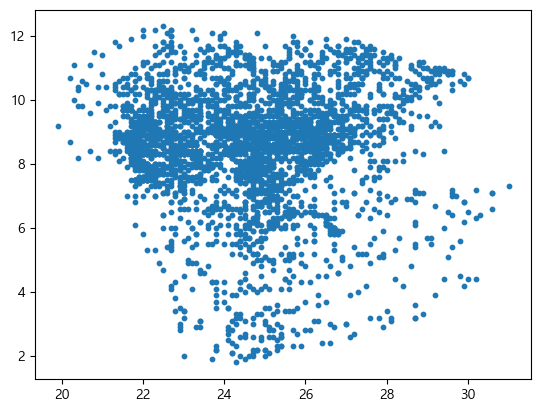

In [122]:
# scatter() 함수로 산점도 그래프 생성

plt.scatter(x=df_wm['수온'], y=df_wm['용존산소(㎎/L)'], s=10)
plt.show()

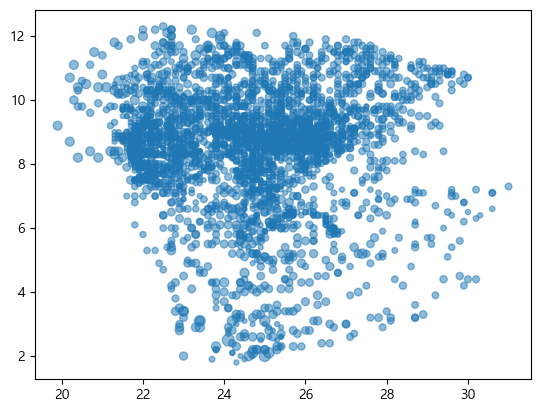

In [123]:
# 점의 크기도 변수를 할당할 수 있음
x = df_wm['수온']
y = df_wm['용존산소(㎎/L)']
s = df_wm['총질소(㎎/L)'] * 5
plt.scatter(x=x, y=y, s=s, alpha=0.5) # alpha : 투명도
plt.show()

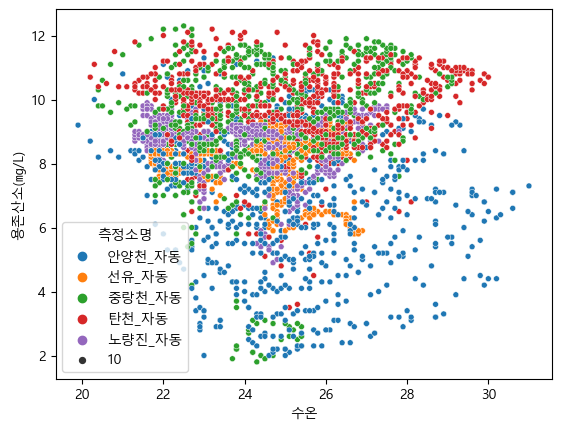

In [125]:
# scatterplot() 함수로 산점도 그래프 생성
    # size 인자로 점의 크기 설정(상대적) 
    # hue 인자로 점의 그룹별 색상 분리
sns.scatterplot(data=df_wm, x='수온', y='용존산소(㎎/L)', size=10, hue='측정소명')
plt.show()

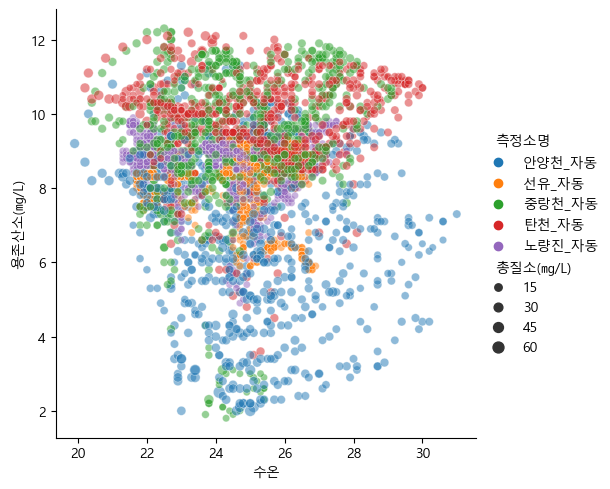

In [127]:
# relplot() 함수로 정보를 표 바깥으로

sns.relplot(kind='scatter',data=df_wm, x='수온',  y='용존산소(㎎/L)', 
            size=df_wm['총질소(㎎/L)'] * 5, 
            hue='측정소명', alpha=0.5)
plt.show()

In [130]:
# 산점도의 분포는 상관관계를 따름
# corr()를 이용하여 상관관계 파악
df_wm[['수온','용존산소(㎎/L)','총질소(㎎/L)','pH']].corr()

,수온,용존산소(㎎/L),총질소(㎎/L),pH
수온,1.000000,-0.018090,0.088493,0.284049
용존산소(㎎/L),-0.018090,1.000000,-0.064566,0.353726
총질소(㎎/L),0.088493,-0.064566,1.000000,0.015786
pH,0.284049,0.353726,0.015786,1.000000



## 2 여러 그래프
그래프가 그려지는 표는 Axes이며 Axes는 Figure에 여러개가 그려질수 있음
 - `figure()` : 그림판(Figure) 설정  
 - `subplot()` : 그림판에 표(Axes)생성  

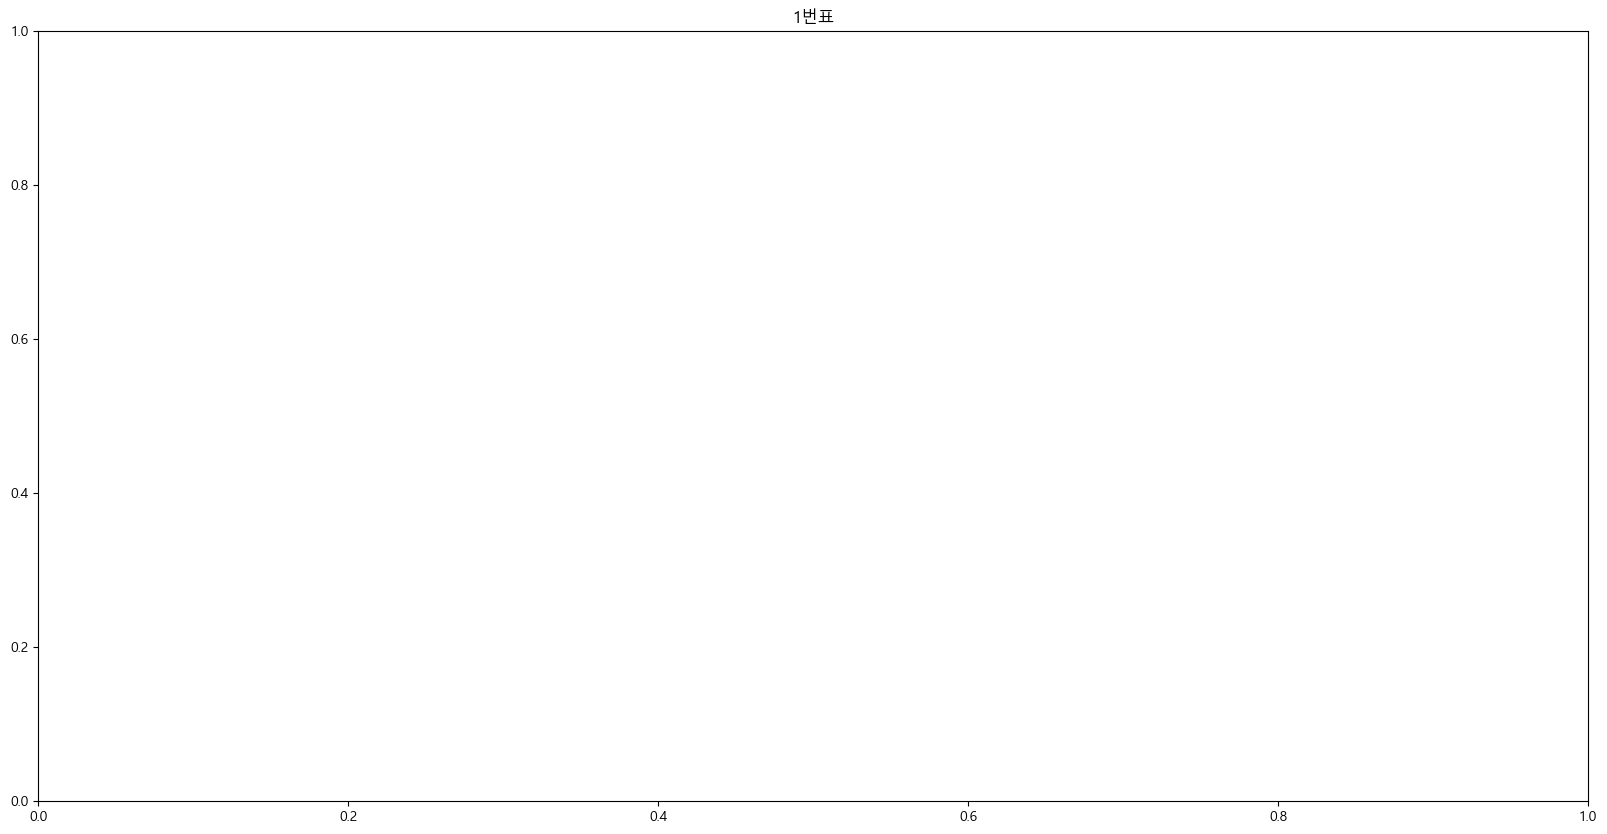

In [5]:
# figure() 으로 Figure 정의
# subplot() 으로 Axes 생성
plt.figure(figsize=(20,10))
ax1 = plt.subplot()
ax1.set_title('1번표')
plt.show()

### 2.1 하나의 표안에 여러개의 그래프 그리기
> 하나의 Axes 또는 plt모듈에서 연속적으로 그래프 함수 사용

In [27]:
g_sp = df_sp.groupby('race/ethnicity')[['math score','reading score']].mean()

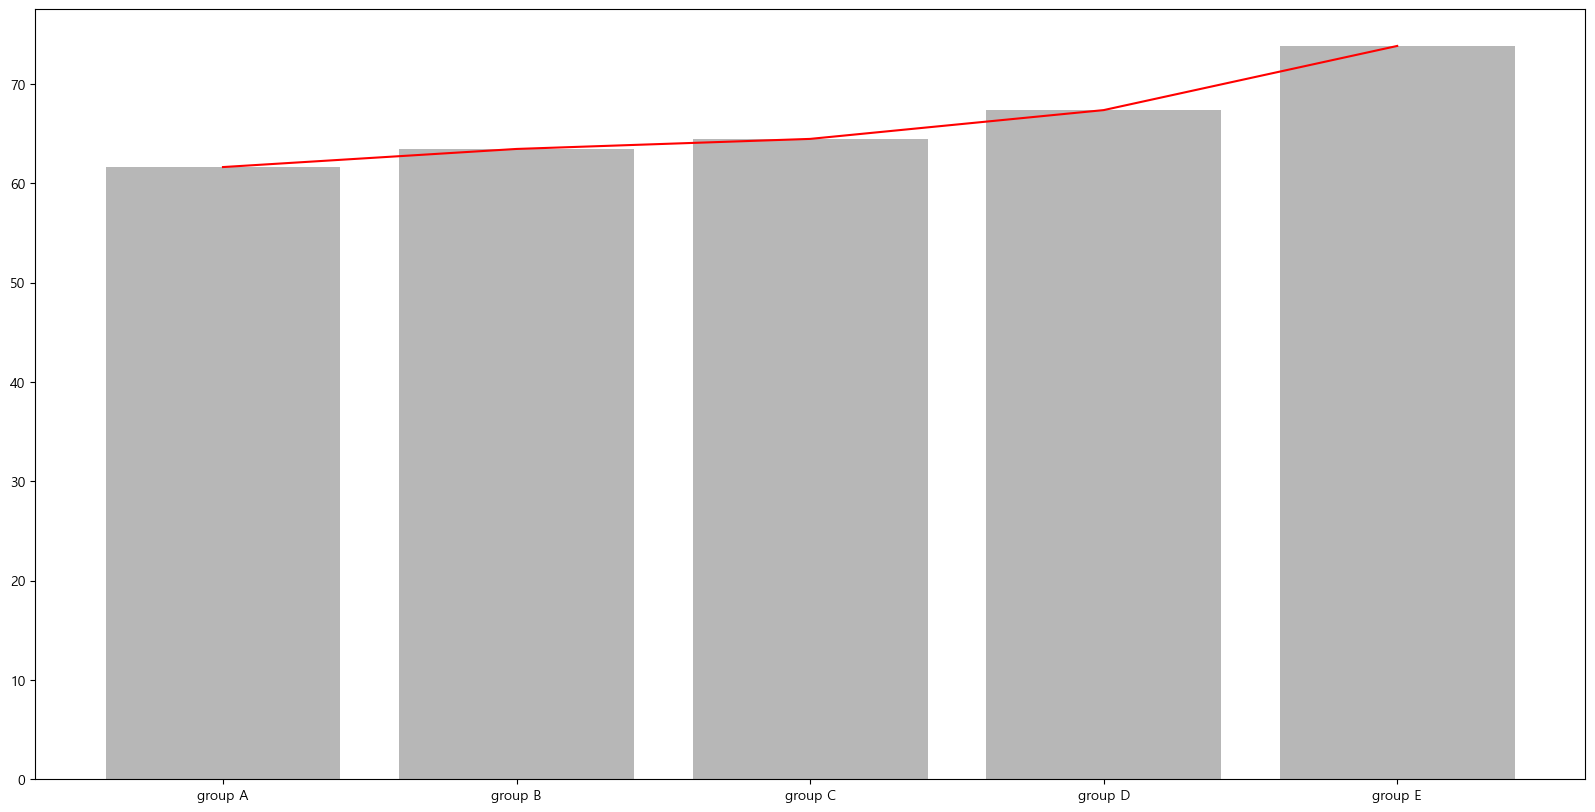

In [28]:
# 하나의 표안에 두개의 그래프 그리기
plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(x=g_sp.index, height=g_sp['math score'], color = '#B7B7B7') # color인자를 통해 색상 지정
ax.plot(g_sp.index, g_sp['math score'], color = 'red')
plt.show()

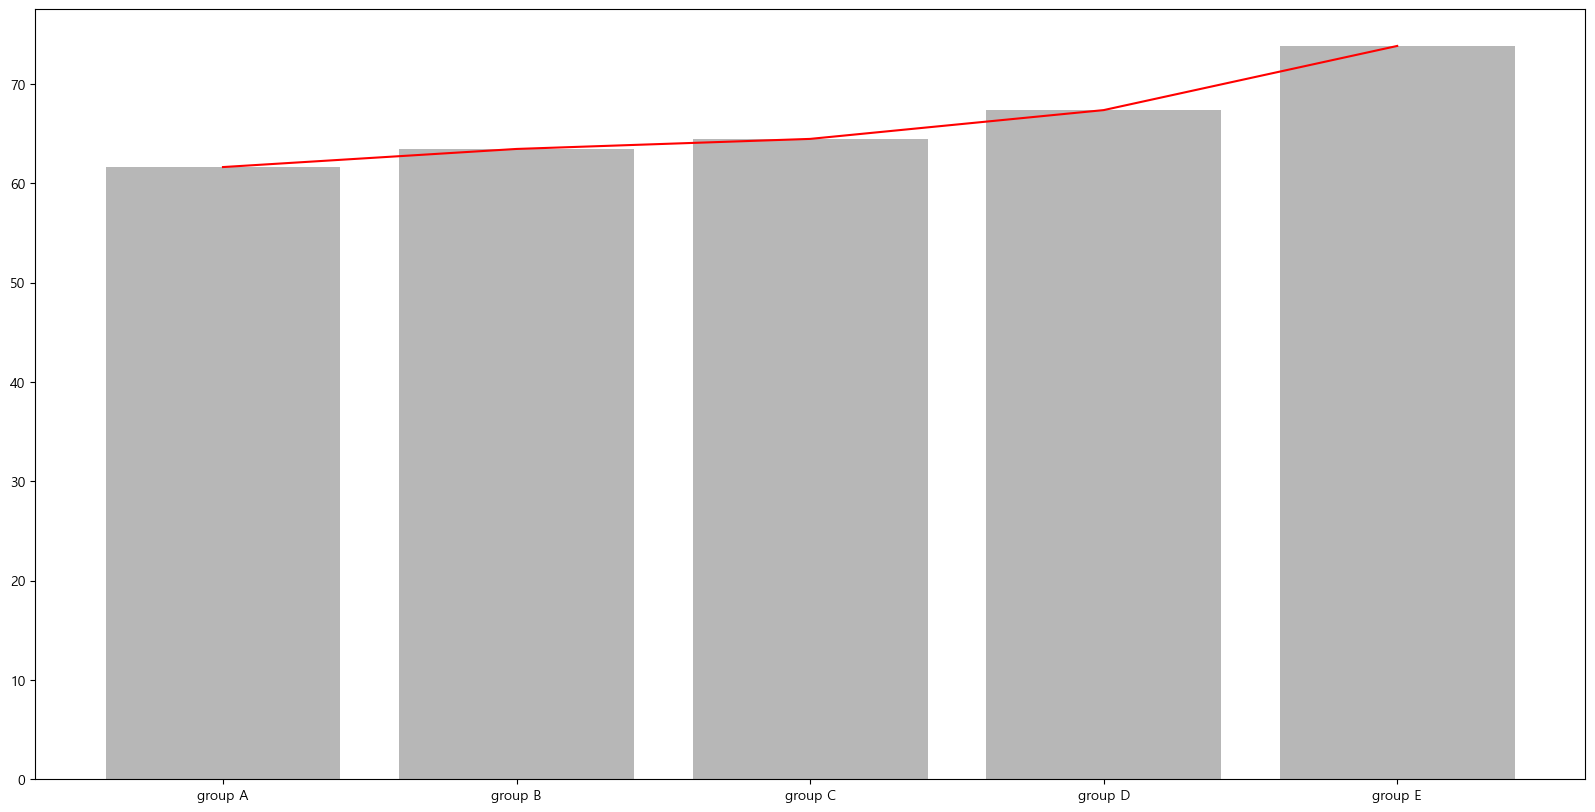

In [29]:
plt.figure(figsize=(20,10))
plt.bar(x=g_sp.index, height=g_sp['math score'], color = '#B7B7B7')
plt.plot(g_sp.index, g_sp['math score'], color = 'red')
plt.show()

In [30]:
g_all = df_sp.groupby('race/ethnicity').mean()
g_all

C:\Users\trave\AppData\Local\Temp\ipykernel_45536\3408925058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g_all = df_sp.groupby('race/ethnicity').mean()


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


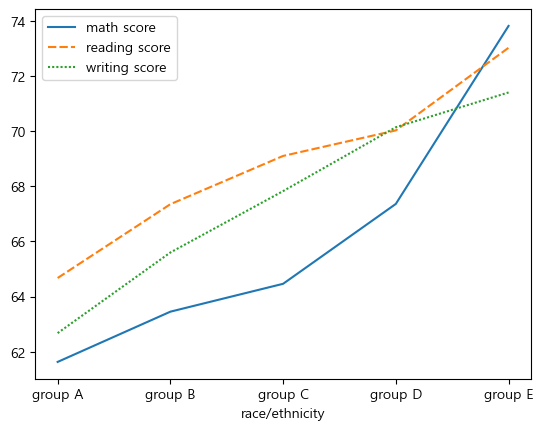

In [31]:
# 데이터구조에 따라 seaborn으로 간단하게 여러개의 선그래프 작성
    # x은 index로, y축은 각 컬럼의 값으로 여러개 생성
ax = plt.subplot()
sns.lineplot(data = g_all, ax = ax) # ax인자로 원하는 Axes 그리기 가능
plt.show()

math score
reading score
writing score


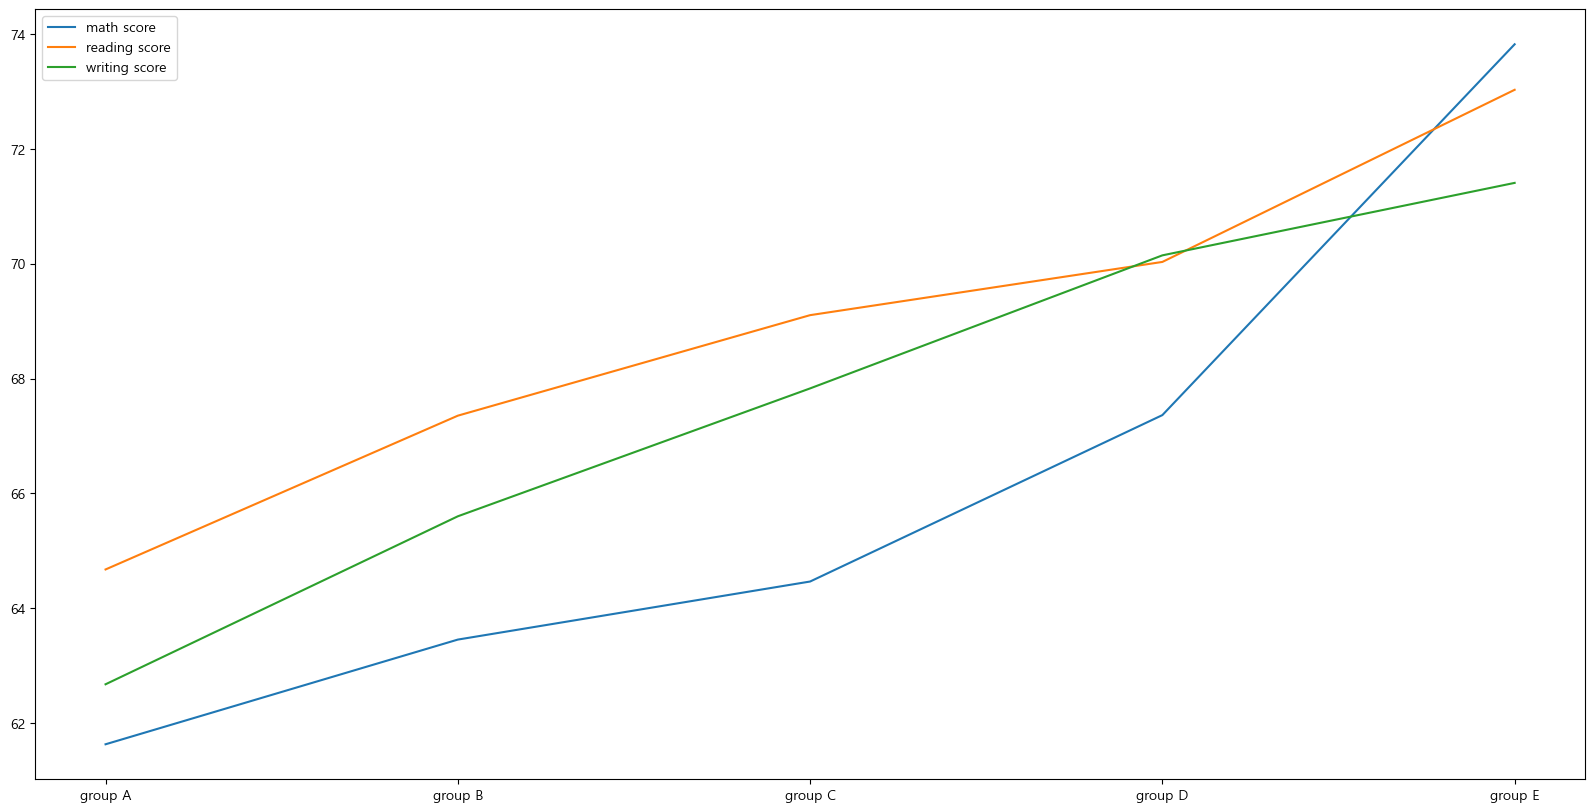

In [32]:
# 데이터프레임을 for문으로 반복시 컬럼이름이 하나씩 반환
plt.figure(figsize=(20,10))
ax = plt.subplot()

for col in g_all:
    print(col)
    ax.plot(g_all.index, g_all[col], label = col)
ax.legend() # 라벨 표기
plt.show()

### 2.2 하나의 그림판에 여러개의 표 그리기
**subplot()** 함수를 활용하여 여러개의 Axes를 생성하고 각 Axes에 그래프 함수 사용
- row, col, index 컬럼을 지정하여 그림판안의 표 배치를 구성하고 원하는 표를 반환
- `row`: 행의 개수를 지정
- `col`: 열의 개수를 지정
- `index`: row,col이 정해지면 순서를 통해 원하는 배치의 표를 반환

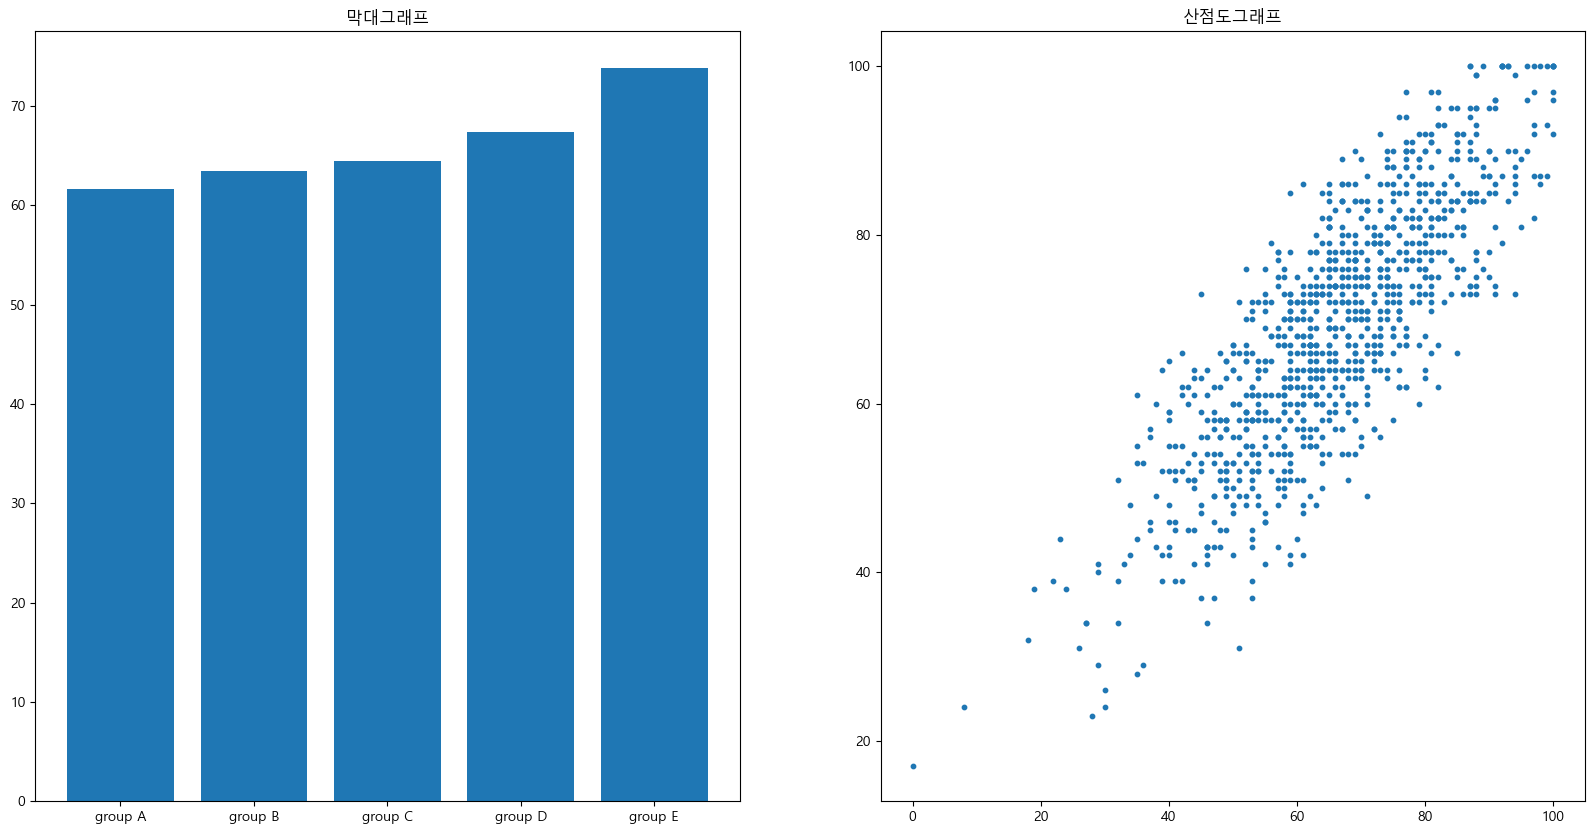

In [33]:
# subplot(row, col, index)
plt.figure(figsize = (20,10))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(x=g_sp.index, height=g_sp['math score'])
ax1.set_title('막대그래프')

ax2.scatter(x=df_sp['math score'], y=df_sp['reading score'], s=10)
ax2.set_title('산점도그래프')

plt.show()

---
## 실습 해보기

#### [실습 2-1] df_hs 데이터에서 2022년도에 해당하는 각 시도별로 진료인원(명)의 평균을 수평 막대그래프로 출력

In [52]:
df_hs = pd.read_csv('data/국민건강보험공단_시군구별 온열질환자 수_20230630.csv',encoding = 'CP949', na_values='*')
df_hs

,진료년도,시도,시군구,진료인원(명)
0,2010년,서울특별시,종로구,19.0
1,2010년,서울특별시,중구,10.0
2,2010년,서울특별시,용산구,16.0
3,2010년,서울특별시,성동구,24.0
4,2010년,서울특별시,광진구,108.0
...,...,...,...,...
3284,2022년,경상남도,함양군,18.0
3285,2022년,경상남도,거창군,19.0
3286,2022년,경상남도,합천군,42.0
3287,2022년,제주특별자치도,제주시,265.0


#### [실습 2-2]  df_pm 데이터에서 성북구의 평균 미세먼지와(PM10)를 초미세먼지(PM25) 하나의 표에 2개의 선그래프로 출력 (x축 : 날짜, y축 이용객수합계)

In [58]:
df_pm = pd.read_csv('data/서울특별시_시간별_(초)미세먼지/서울시 대기질 자료 제공_2022.csv', encoding='CP949')
df_pm

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2022-12-31 23:00,평균,59.0,46.0
1,2022-12-31 23:00,강남구,57.0,44.0
2,2022-12-31 23:00,강동구,68.0,55.0
3,2022-12-31 23:00,강북구,59.0,42.0
4,2022-12-31 23:00,강서구,62.0,40.0
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


#### [실습 3-3] 다음 df_pr에서 Gender, Smokes, Alcohol, Exercise 컬럼에 대해 색상이 다르게 나타나는 4개의 Pulse1,Pulse2의 산점도 그래프를 그리기 (그림판 크기는 (10,10), 표배치는 (2,2))

In [61]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head()

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93


<br>

## 3. 특수 그래프 그리기

**matplotlib** 과 **seaborn**은 히스토그램, 히트맵, 상자그림 등 특수한 목적을 가진 통계 그래프를 제공


In [33]:
df_sp = pd.read_csv('./data/StudentsPerformance.csv')
df_ins = pd.read_csv('data/insurance.csv')
df_tp = pd.read_csv('./data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')

<br>

### 3.1. 히스토그램
**matplotlib** 과 **seaborn**은 데이터의 분포를 확인할 수 있는 히스토그램을 제공

In [34]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


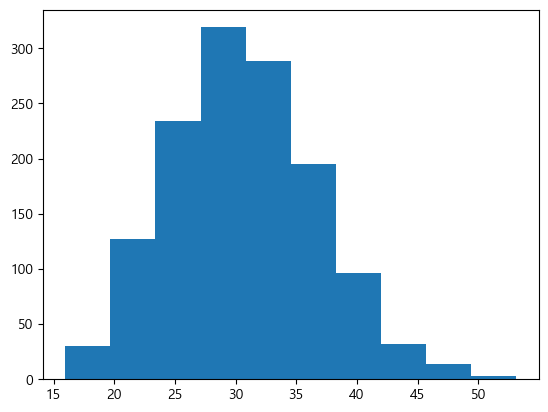

In [35]:
# hist()을 활용한 히스토그램
    # x축에 해당하는 하나의 변수만 입력
plt.hist(df_ins['bmi'])
plt.show()

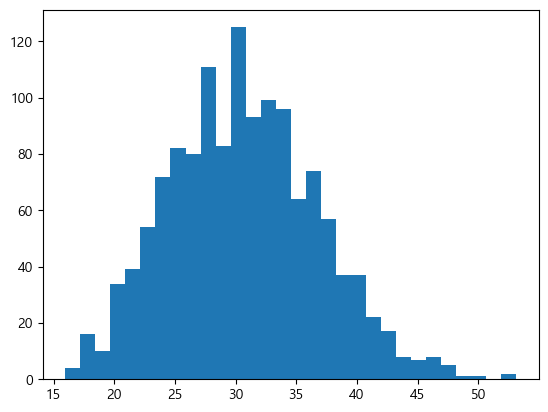

In [36]:
# bins 인자로 표현범위 조정
plt.hist(df_ins['bmi'],bins=30)
plt.show()

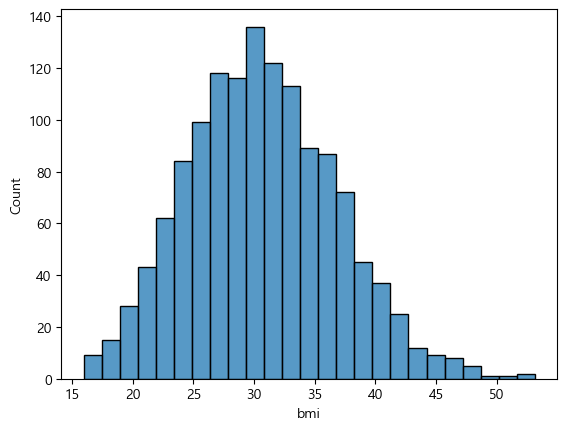

In [37]:
# histplot()을 활용한 히스토그램
sns.histplot(data=df_ins,
             x='bmi')
plt.show()

<Axes: xlabel='bmi', ylabel='Count'>

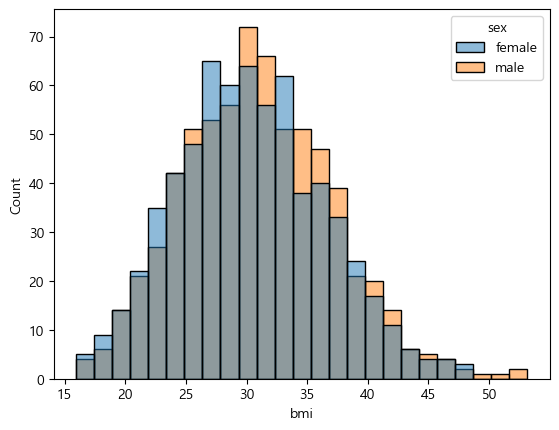

In [38]:
sns.histplot(data=df_ins, 
             x = 'bmi',
             hue='sex')

<br>

### 3.2. 히트맵
**seaborn**은 테이블형(매트릭스)의 데이터를 시각화 하는 히트맵 *heatmap()* 제공

In [39]:
df_tp.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327


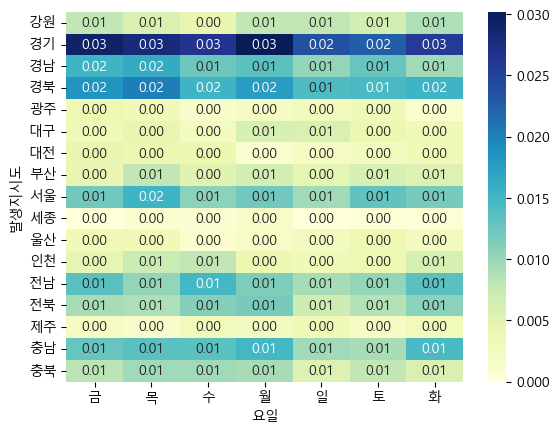

In [40]:
# heatmap() 함수에 테이블형 구조를 입력하여 히트맵 생성
#     cmap : 색상표
#     annot : 데이터값 표현
#     fmt='.2f' : 소수점 표현
ctab = pd.crosstab(df_tp['발생지시도'], df_tp['요일'], normalize='all')
sns.heatmap(ctab, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

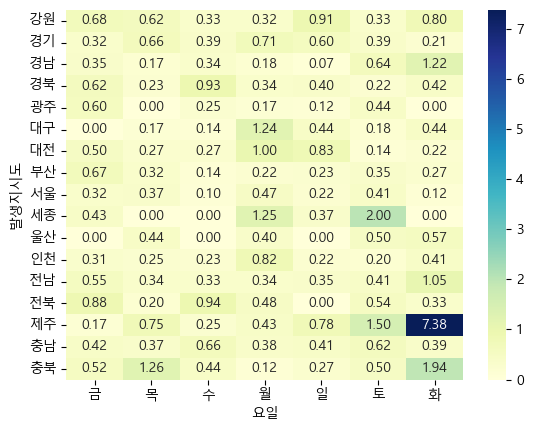

In [41]:
import numpy as np
pivot = pd.pivot_table(df_tp, index='발생지시도', columns='요일', values='부상자수', aggfunc=np.mean)
pivot = pivot.fillna(pivot.mean()) # 피벗은 결측치가 생길수 있음
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

<br>

### 3.3. 상자그림
**matplotlib** 과 **seaborn**은 사분위를통한 데이터의 분포를 표현해주는 상자그림을 그릴수 있음 *boxplot()*

사분위수(quartile)
- 최솟값(minimum, 0%)
- Q1(1st Quartile, 25%)
- 중앙값(median, 50%)
- Q3(3rd Quartile, 75%)
- 최댓값(maximum, 100%)

In [43]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
# 사분위는 pandas의 quantile 함수로 값만 계산 가능
df_ins[['age','bmi']].quantile(0.75) # 75%이므로 Q3


age    51.00000
bmi    34.69375
Name: 0.75, dtype: float64

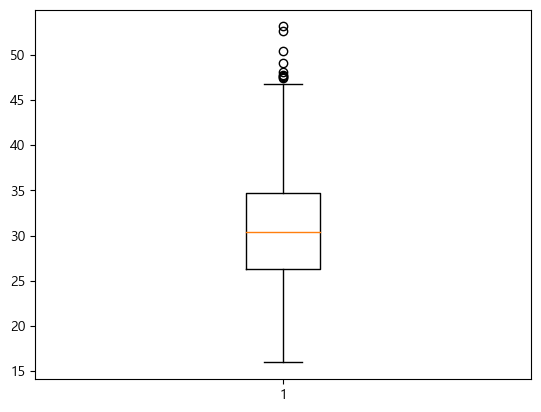

In [45]:
# matplotlib의 boxplot()으로 상자그림 그리기
    # y축에 해당하는 하나의 변수만 입력
plt.boxplot(df_ins['bmi'])
plt.show()

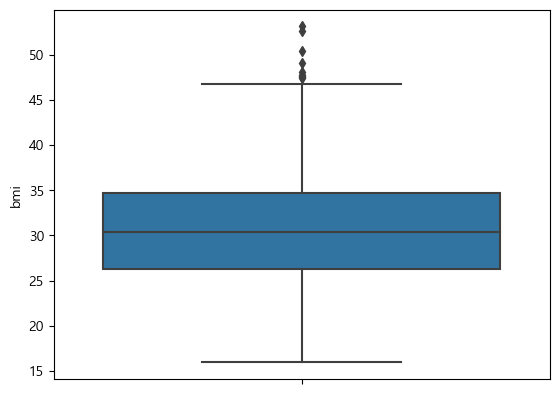

In [46]:
# seaborn의 boxplot()으로 상자그림 그리기
sns.boxplot(data=df_ins, y='bmi')
plt.show()

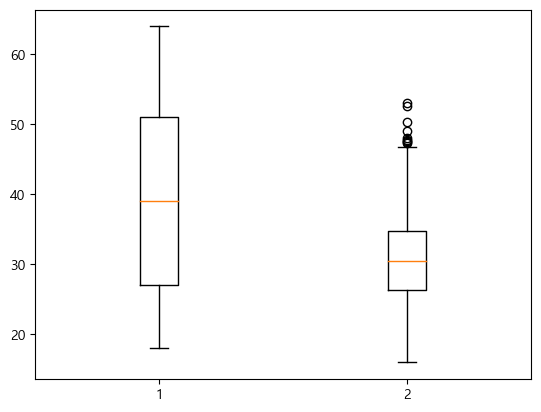

In [47]:
# 여러개의 상자그림 그리기 plt에서 여러개의 컬럼 입력
plt.boxplot(df_ins[['age','bmi']])
plt.show()

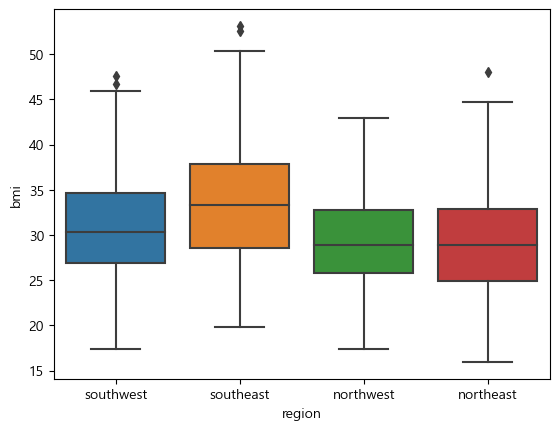

In [48]:
# 그룹마다 상자 그려주기 seaborn의 x인자 사용
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi')
plt.show()

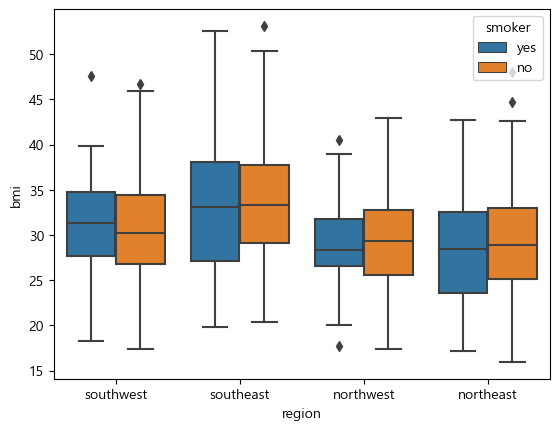

In [49]:
# hue를 추가로 활용한 상자그림
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi',
            hue='smoker')
plt.show()

* 참고: [Color Palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<br>

#### [참고] 결과 그래프의 저장
>*savefig()* 함수로 그래프를 저장 가능

In [50]:
# 폴더 생성
%mkdir result

하위 디렉터리 또는 파일 result이(가) 이미 있습니다.


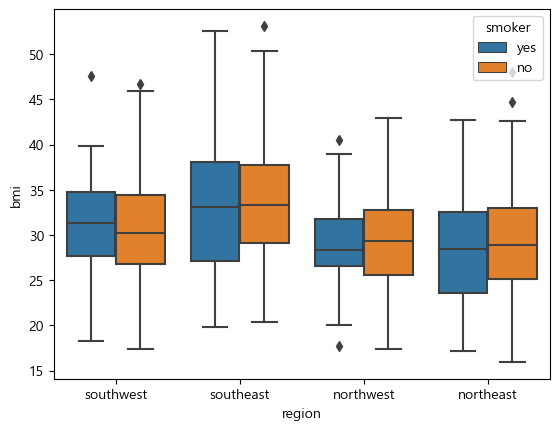

In [51]:
# savefig()을 활용한 그래프 저장
sns.boxplot(data=df_ins,
            x='region', 
            y='bmi',
            hue='smoker')
plt.savefig('plot1.jpg')

---
## 실습 해보기


#### [실습 3-1] 특수그래프

1. df_di에서 '습도의'의 히스토그램을 그리기
2. df_di에서 지역과 오염범례에 대한 교차표를 히트맵으로 그리기 (지역 축으로 정규화)
3. df_di에서 측정일자와 지역 그룹별 재비산먼지농도의 평균을 피벗테이블로 만들고 히트맵으로 그리기, 이때 결측치는 측정일자별 평균으로 채움(측정일자가 컬럼)
4. 기온을 지역별로 나누어서 상자그림으로 그리기


In [93]:
df_di = pd.read_csv('./data/한국환경공단_도로 재비산먼지 측정 정보.csv')
df_di['측정일자'] = df_di['측정일자'].astype('datetime64[ns]').dt.strftime('%m월')
df_di

,측정일자,지역,지역명,도로명,기온,습도,재비산먼지농도,오염범례
0,09월,경기,성남시 수정구,여수대로,26,66,99,좋음
1,09월,경기,성남시 수정구,대왕판교로,27,64,43,매우좋음
2,09월,경기,성남시 수정구,성남대로,28,61,115,보통
3,09월,경기,성남시 중원구,성남대로,28,58,18,매우좋음
4,09월,경기,성남시 중원구,돌마로,27,64,7,매우좋음
...,...,...,...,...,...,...,...,...
6092,02월,서울,금천구,시흥대로(북→남),6,91,12,매우좋음
6093,02월,서울,금천구,독산로(남→북),6,91,16,매우좋음
6094,02월,서울,구로구,구로중앙로(남→북),7,90,7,매우좋음
6095,02월,서울,구로구,경인로(동→서),7,90,11,매우좋음


#### End of script